## 4.3. plot individual genes in pseudotime

After recovering the pseudotime in Script 3.1, we can plot individual genes in pseudotime. If you don't want to run Scipt 3.1. You can find the recovered pseudotime also in `results/pseudotime/`. 

In this Notebook we will focus on some of the genes that are interesting for our research questions, but feel free to try other genes as well. 

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd
import copy

# single cell libraries
import scanpy as sc
sc.settings.verbosity = 0 

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

# import own functions
from plotting import *
from utils import *

# autoreload
%load_ext autoreload
%autoreload 2

### Load data and pseudotime

Here, we load the preprocessed HSPC dataset (as filtered in notebook 1.3).

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### load pseudotime 
pseudotime_path = "../results/pseudotime/pseudotime_all_cells.csv"
pseudotime = pd.read_csv(pseudotime_path, sep=",", index_col=0)

In [4]:
### add pseudotime to dataset
adata.obs["pseudotime"] = pseudotime

In [5]:
### ad pseudotemporal ordering to the dataset
adata.obs["pt_ordering"] = np.argsort(np.argsort(adata.obs["pseudotime"]))

In [6]:
### get timepoints and cell types
timepoints = adata.obs["time"].cat.categories.values
celltypes = adata.obs['clusters'].cat.categories.values

### Processing
Here we process the dataset. Depending on whether we want to show individual genes or multiple genes in one plot, we have to scale the data.

In [7]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [8]:
### scale dataset
scaled_adata = copy.deepcopy(adata)
sc.pp.scale(scaled_adata)

In [9]:
adata.X = adata.X.todense()

### Plotting

Here we plot several genes in pseudotime. We use the function `plot_in_pseudotime`. You can have a look in the file `utils.py`, to get a better idea of what the function is doing. The function can plot many different things. In this script we use it to either create a figure where we see the expression of a single gene, but in all the different clusters, or we use it to create a figure where you can see the expression of multiple genes in the whole dataset. Additionally, we make plots with and without the confidence interval included.

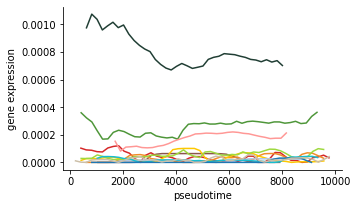

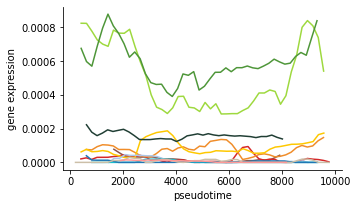

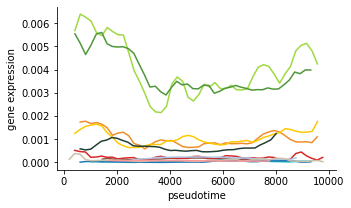

In [10]:
genes = ["Ncam1","Csf1r","Irf8"]

for gene in genes:
    plot_in_pseudotime(
        adata, 
        [gene],
        plot_all_clusters_separate=True,
        smoothing_window_size=50,
        plot_legend=False, 
        add_CI=False,
        save=False,
    )

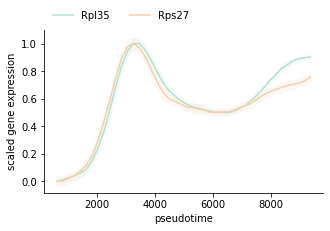

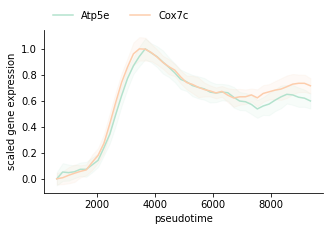

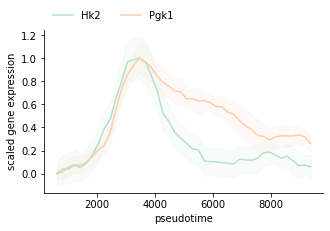

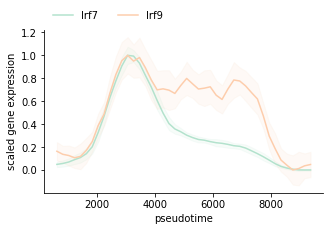

In [11]:
gene_selection = [["Rpl35", "Rps27"],["Atp5e", "Cox7c"],["Hk2", "Pgk1"],["Irf7", "Irf9"]]

for genes in gene_selection:
    plot_in_pseudotime(
        adata, 
        genes, 
        plot_all_clusters=True, 
        smoothing_window_size=600, 
        scale=True, 
        legend_location='top',
        save=True,
        save_path= f"../figures/4.3.PT_plot_" + '_'.join(genes) + ".pdf"
    )

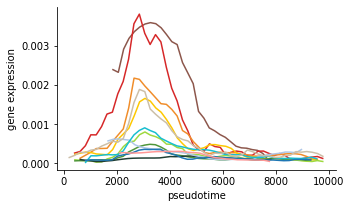

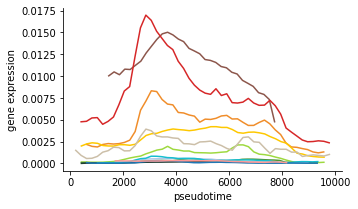

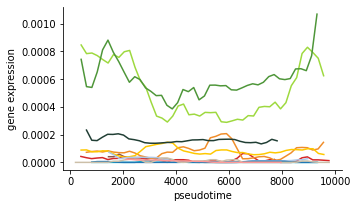

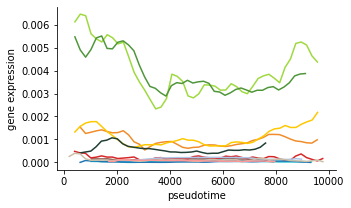

In [12]:
genes = ["Ifit2","Ly6a","Csf1r","Irf8"]

for gene in genes:
    plot_in_pseudotime(
        adata, 
        [gene],
        plot_all_clusters_separate=True,
        smoothing_window_size=50,
        plot_legend=False, 
        add_CI=False,
        save=True,
        save_path= f"../figures/4.3.PT_plot_{gene}.pdf"
    )

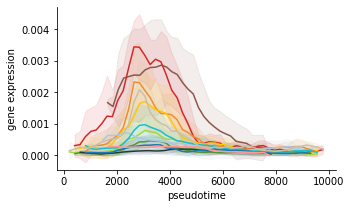

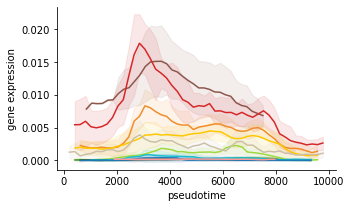

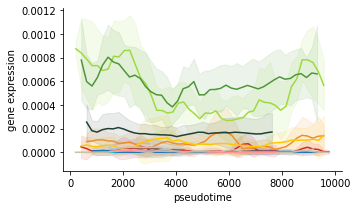

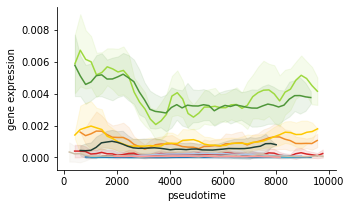

In [13]:
genes = ["Ifit2","Ly6a","Csf1r","Irf8"]

for gene in genes:
    plot_in_pseudotime(
        adata, 
        [gene],
        plot_all_clusters_separate=True,
        smoothing_window_size=50,
        plot_legend=False, 
        add_CI=True,
        save=True,
        save_path= f"../figures/4.3.PT_plot_{gene}_with_CI.pdf"
    )